<a href="https://colab.research.google.com/github/mayanksreal/marks-evaluation/blob/main/cnn-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Number Recognition (CNN)

import numpy as np
import random
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Importing Libraries

In [ ]:
import numpy as np
import random
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Importing Data

In [ ]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(
np.shape(x_train),
np.shape(y_train),
np.shape(x_test),
np.shape(y_test), sep = '\n'
    )

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Preprocessing Data

In [ ]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
print(
np.shape(x_train),
np.shape(y_train),
np.shape(x_test),
np.shape(y_test), sep = '\n'
    )

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


### Normalization

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

## Building Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

## Training

In [ ]:
model.fit(x = x_train, y = y_train, epochs = 3, validation_split=0.2, batch_size = 1000)

Epoch 1/3
48/48 [==============================] - 31s 630ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0437 - val_accuracy: 0.9880
Epoch 2/3
48/48 [==============================] - 36s 741ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0415 - val_accuracy: 0.9886
Epoch 3/3
48/48 [==============================] - 30s 624ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0412 - val_accuracy: 0.9884


## Testing

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0372 - accuracy: 0.9877


[0.037171971052885056, 0.9876999855041504]

In [ ]:
def predict(x):
    plt.imshow(x_train[x])
    arr = model.predict(x_train[x].reshape(1,28,28,1))
    indx = arr.max()
    result = (np.argmax(arr == indx))
    print("Predicted Val:",result)
    print("Actual Val:",y_train[x])

# Play around

1/1 [==============================] - 0s 20ms/step
Predicted Val: 2
Actual Val: [2]


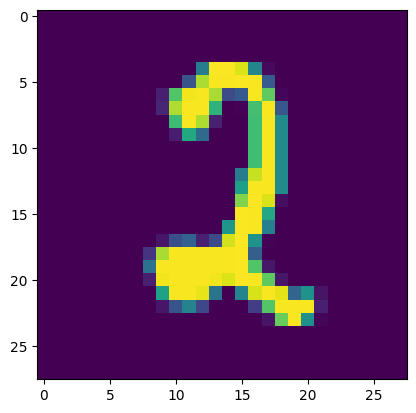

In [ ]:
predict(random.randint(0,60000))

In [ ]:
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0296 - accuracy: 0.9904


[0.02960849553346634, 0.9904000163078308]